In [1]:
run src/preprocessing.py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
mean_sale_price = target_1.mean()
naive_guess = np.ones(len(target_1))*mean_sale_price

In [5]:
naive_r2 = r2_score(target_1, naive_guess)
naive_rmse = np.sqrt(mean_squared_error(target_1, naive_guess))
naive_mae = mean_absolute_error(target_1, naive_guess)

#### Fundamental Question: How much does a home in Ames, Iowa sell for?

In [6]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [7]:
def sample_training_set(X_train, y_train, n_pcnt):
    n = X_train.shape[0]*n_pcnt//100
    return n, X_train[:n], y_train[:n]

def time_function_call(function_call):
    start = time()
    result = function_call
    execution_time = time() - start
    return result, execution_time

def run_model(model, model_name, n_pcnt, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)

    
    n, X_samp, y_samp = sample_training_set(X_train, y_train, n_pcnt)
    
    _, fit_time = time_function_call(
        model.fit(X_samp, y_samp))
    
    train_pred, train_pred_time = time_function_call(
        model.predict(X_samp))
    
    test_pred, test_pred_time = time_function_call(
        model.predict(X_test))    
    
    return {
            'model_name' : model_name,
            'n_pcnt' : n_pcnt,
            'n' : n, 
            'rmse_train' : np.sqrt(mean_squared_error(y_samp, train_pred)),
            'rmse_test' : np.sqrt(mean_squared_error(y_test, test_pred)),
            'mae_train' : mean_absolute_error(y_samp, train_pred),
            'mae_test' : mean_absolute_error(y_test, test_pred),
            'r2_train_score' : model.score(X_samp, y_samp),
            'r2_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

In [8]:
dataset_2.shape, target_2.shape

((1444, 390), (1444,))

In [9]:
test_results = {}
percentages = [1,2,3,4,5,7,10,15,20,25,30,40,50,60,70,80,90,100]
for n in tqdm(percentages):
    test_results[n] = run_model(Lasso(), 'Lasso', n,
                                dataset_2,
                                target_2)


  0%|          | 0/18 [00:00<?, ?it/s]/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
100%|██████████| 18/18 [00:02<00:00,  7.45it/s]


In [10]:
test_results = pd.DataFrame(test_results).T.sort_values('n')
test_results

,fit_time,mae_test,mae_train,model_name,n,n_pcnt,r2_test_score,r2_train_score,rmse_test,rmse_train,test_pred_time,train_pred_time
1,7.15256e-06,55978.7,4.37798,Lasso,10,1,-0.220736,1,82394,4.80578,1.57356e-05,6.67572e-06
2,8.58307e-06,53561.5,7.27929,Lasso,21,2,0.081728,1,71461.2,8.94584,1.09673e-05,6.91414e-06
3,6.19888e-06,41954.3,11.9816,Lasso,32,3,0.393408,1,58080.9,14.7286,5.72205e-06,5.96046e-06
4,1.3113e-05,40827.2,16.798,Lasso,43,4,0.429471,1,56327.9,21.172,5.48363e-06,5.48363e-06
5,7.39098e-06,36467,22.8864,Lasso,54,5,0.529258,1,51165.4,29.5307,1.16825e-05,7.15256e-06
7,1.3113e-05,34542.5,46.6068,Lasso,75,7,0.593882,0.999999,47523.8,57.9645,1.04904e-05,7.15256e-06
10,5.24521e-06,36820,67.3206,Lasso,108,10,0.531366,0.999999,51050.7,81.4511,6.19888e-06,5.96046e-06
15,9.29832e-06,44355.6,211.232,Lasso,162,15,0.332694,0.999989,60918.2,301.13,9.53674e-06,8.34465e-06
20,6.91414e-06,50261.8,955.31,Lasso,216,20,0.188098,0.999718,67194.9,1408,5.96046e-06,6.19888e-06
25,5.00679e-06,44782.9,3011.91,Lasso,270,25,0.30153,0.997078,62324.5,4381.52,5.48363e-06,5.72205e-06


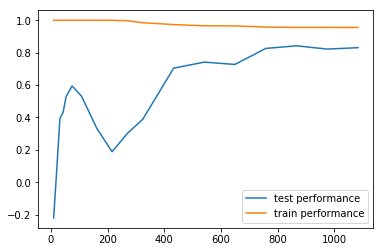

In [11]:
plt.plot(test_results.n, test_results.r2_test_score, label='test performance')
plt.plot(test_results.n, test_results.r2_train_score, label='train performance')
plt.legend()